In [3]:
import wfdb
import numpy as np
import pandas as pd
import neurokit2 as nk
import wfdb
import os
import ast
import numpy as np
import plotly.graph_objects as go
import seaborn as sns

In [45]:
from ECGfeaturizer import featurize as ef
from ECGfeaturizer import featurize0 as ef0

In [3]:
%reload_ext autoreload

In [46]:
#Set the read file path
path = 'D:/Test Jupyter/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/ptbxl/'
# directory = '/D:/Test Jupyter/ECG-Classfier-main/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/00000/'

In [47]:
X = np.load(path + 'raw100.npy', allow_pickle=True)

In [48]:
X.shape

(21801, 1000, 12)

In [6]:
# ecg = X[12567][:,0]

In [7]:
# # Create an instance of the get_features class
# features_extractor = ef0.get_features(r_peak=True, r_int=True, p_peak=True, p_int=True, t_peak=True, t_int=True, q_peak=True, q_int=True, s_peak=True, s_int=True, qrs_dur=True, qt_dur=True, pr_dur=True)

# # Specify the ECG recording and sample frequency
# recording = ecg# Your ECG recording data, e.g., a NumPy array
# sample_freq = 100# Your sample frequency, e.g., 1000

# # Call the featurize_ecg method
# feature_list, feature_name, peaks = features_extractor.featurize_ecg(recording, sample_freq)

# # Print the extracted features
# # for name, value in zip(feature_name, feature_list):
# #     print(f"{name}: {value}")

# p_peaks, q_peaks, r_peaks, s_peaks, t_peaks = peaks



In [8]:
# p_peaks

In [9]:
import neurokit2 as nk

ecg = X[3][:,1]

# Process the selected lead of the ECG signal
signals, info = nk.ecg_process(ecg, sampling_rate=100)
# info
# nk.ecg_plot(signals, info)

# Calculate QRS duration based on Q-wave onset and S-wave offset
p_onsets = info["ECG_P_Onsets"]
qrs_onsets = info["ECG_R_Onsets"]
qrs_offsets = info["ECG_R_Offsets"]
# qrs_durations = qrs_offsets - qrs_onsets # This will give you the duration in sample points
qrs_offsets


[113, 196, 278, 370, 446, 529, 607, 686, 762, 847, 923, nan]

In [10]:
qrs_onsets

[94, 181, 272, 351, nan, 508, 590, nan, 752, 828, 907, nan]

In [11]:
sample_freq=100
def interval_calc_all(onset_values, offset_values, sample_freq):
    # Create an array to store the durations
    durations = []

    # Iterate through the corresponding onset and offset values
    for onset, offset in zip(onset_values, offset_values):
        # Check if either onset or offset is NaN
        if not np.isnan(onset) and not np.isnan(offset):
            duration = (offset - onset) / sample_freq
            durations.append(duration)

    # Check if there are valid durations
    if len(durations) > 0:
        mean_interval = round(np.mean(durations), 5)
        std_interval = round(np.std(durations), 5)
    else:
        # If there are no valid durations, set mean and std to NaN
        mean_interval = float("NaN")
        std_interval = float("NaN")

    return mean_interval, std_interval, durations
qrs_mean, qrs_std, qrs_durations = interval_calc_all(qrs_onsets, qrs_offsets, sample_freq)

In [12]:
qrs_mean

0.15778

In [13]:
qrs_durations

[0.19, 0.15, 0.06, 0.19, 0.21, 0.17, 0.1, 0.19, 0.16]

In [14]:
import matplotlib.pyplot as plt
from ECGfeaturizer import featurize as ef

ecg = X[3][:,1]

# Create an instance of the get_features class
# features_extractor = ef.get_features(r_peak=True, r_int=True, p_peak=True, p_int=True, t_peak=True, t_int=True, q_peak=True, q_int=True, s_peak=True, s_int=True, qrs_dur=True, qt_dur=True, pr_dur=True)
features_extractor = ef.get_features(r_peak=True, r_int=True, p_peak=True, p_int=True, t_peak=True, t_int=True, q_peak=True, q_int=True, s_peak=True, s_int=True, qrs_dur=True, st_dur=True, pr_dur=True)

# Specify the ECG recording and sample frequency
recording = ecg# Your ECG recording data, e.g., a NumPy array
sample_freq = 100# Your sample frequency, e.g., 1000

# Call the featurize_ecg method
# feature_list, feature_name, intervals, peaks = features_extractor.featurize_ecg(recording, sample_freq)
feature_list, feature_name, intervals, durations, peaks = features_extractor.featurize_ecg(recording, sample_freq)
# feature_list, feature_name, intervals = features_extractor.corr_and_featurize_ecg(recording, sample_freq, r_peaks, s_peaks, q_peaks, p_peaks, t_peaks)
p_peaks, q_peaks, r_peaks, s_peaks, t_peaks = peaks
# p_onset, qrs_onset, qrs_offset, t_offset = onoffset


# Plot the ECG signal
# plt.figure(figsize=(12, 6))
# plt.plot(ecg, color='black', label='ECG Signal')

# # Plot P, Q, R, S, and T peaks
# plt.scatter(p_peaks, ecg[p_peaks], c='r', marker='o', label='P Peaks')
# plt.scatter(q_peaks, ecg[q_peaks], c='g', marker='o', label='Q Peaks')
# plt.scatter(r_peaks, ecg[r_peaks], c='b', marker='o', label='R Peaks')
# plt.scatter(s_peaks, ecg[s_peaks], c='m', marker='o', label='S Peaks')
# plt.scatter(t_peaks, ecg[t_peaks], c='y', marker='o', label='T Peaks')

# plt.title('ECG Signal with P, Q, R, S, T Peaks')
# plt.xlabel('Sample')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.grid(True)
# plt.show()


In [15]:
feature_name

array(['mean_rr_interval', 'sd_rr_interval', 'mean_r_peak', 'sd_r_peak',
       'mean_pp_interval', 'sd_pp_interval', 'mean_p_peak', 'sd_p_peak',
       'mean_tt_interval', 'sd_tt_interval', 'mean_t_peak', 'sd_t_peak',
       'mean_qq_interval', 'sd_qq_interval', 'mean_q_peak', 'sd_q_peak',
       'mean_ss_interval', 'sd_ss_interval', 'mean_s_peak', 'sd_s_peak',
       'pr_mean', 'pr_std', 'qrs_mean', 'qrs_std', 'st_mean', 'st_std'],
      dtype='<U16')

In [16]:
feature_list

array([ 0.80090909,  0.04055401,  0.93291667,  0.57301563,  0.80181818,
        0.08122004,  0.0558734 ,  0.08817179,  0.808     ,  0.04093898,
        0.43032944,  0.12868313,  0.811     ,  0.10866922, -0.16200324,
        0.08947665,  0.809     ,  0.03935734, -0.26336282,  0.10772648,
        0.77778   ,  0.69046   ,  0.1475    ,  0.05309   ,  0.26636   ,
        0.03418   ])

In [17]:
intervals.items()

dict_items([('rr_intervals', array([0.83, 0.86, 0.87, 0.79, 0.8 , 0.78, 0.79, 0.8 , 0.81, 0.76, 0.72])), ('pp_intervals', array([0.84, 0.87, 0.87, 0.81, 0.76, 0.8 , 0.8 , 0.81, 0.61, 0.93, 0.72])), ('tt_intervals', array([0.82, 0.88, 0.86, 0.82, 0.76, 0.78, 0.8 , 0.83, 0.79, 0.74])), ('qq_intervals', array([0.86, 0.87, 0.87, 0.61, 0.96, 0.76, 0.66, 0.95, 0.79, 0.78])), ('ss_intervals', array([0.83, 0.88, 0.86, 0.82, 0.76, 0.78, 0.79, 0.83, 0.78, 0.76]))])

In [18]:
# qrs_offset

In [19]:
# qrs_onset

In [20]:
durations.items()

dict_items([('pr_durations', [0.06, 0.07, 0.15, 0.07, 0.78, 0.87, 1.68, 1.65, 1.67]), ('qrs_durations', [0.19, 0.15, 0.06, 0.19]), ('st_durations', [0.26, 0.26, 0.31, 0.24, 0.33, 0.24, 0.24, 0.23, 0.32, 0.25, 0.25])])

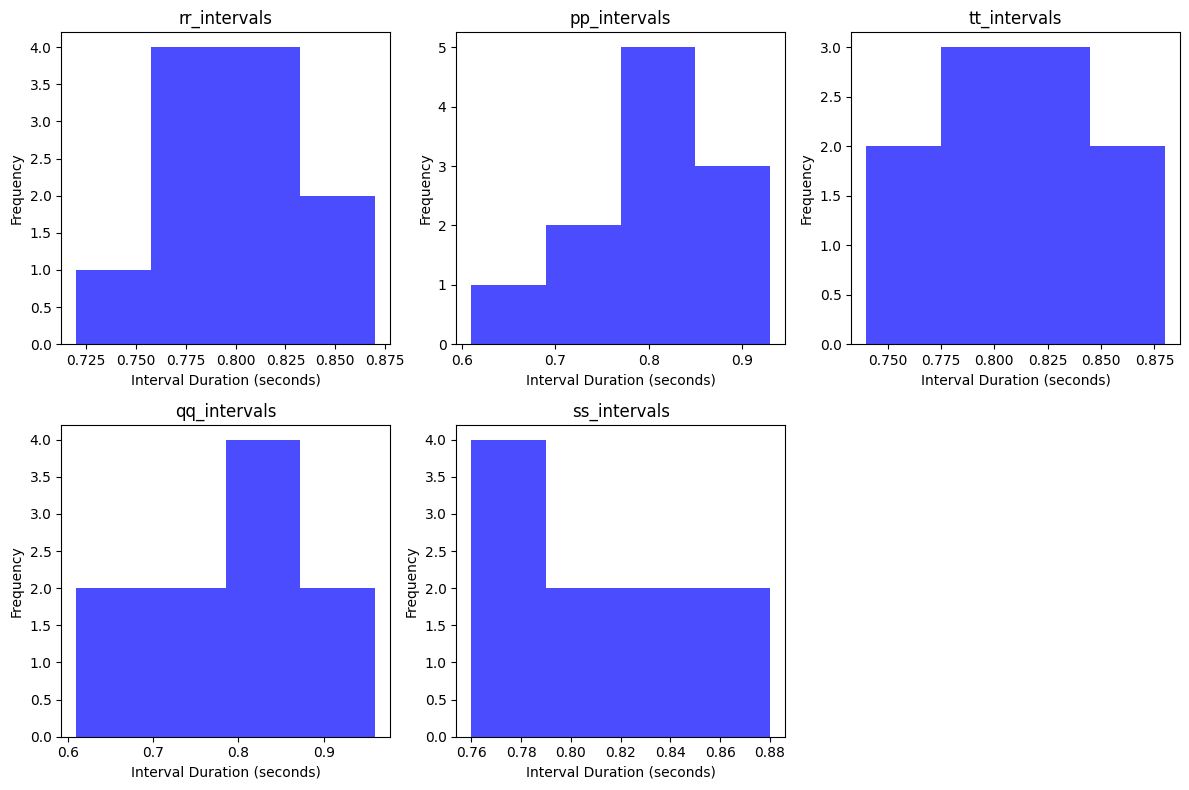

In [21]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming you have the 'intervals' variable containing your intervals
# rr_intervals = intervals['rr_intervals']
# pp_intervals = intervals['pp_intervals']
# qq_intervals = intervals['qq_intervals']
# ss_intervals = intervals['ss_intervals']
# tt_intervals = intervals['tt_intervals']

# # Create subplots for each interval
# plt.figure(figsize=(12, 8))

# # Plot RR intervals
# plt.subplot(2, 3, 1)
# plt.hist(rr_intervals, bins=30, color='b', alpha=0.7)
# plt.title('RR Intervals')
# plt.xlabel('Interval Duration (s)')
# plt.ylabel('Frequency')

# # Plot PP intervals
# plt.subplot(2, 3, 2)
# plt.hist(pp_intervals, bins=30, color='g', alpha=0.7)
# plt.title('PP Intervals')
# plt.xlabel('Interval Duration (s)')
# plt.ylabel('Frequency')

# # Plot QQ intervals
# plt.subplot(2, 3, 3)
# plt.hist(qq_intervals, bins=30, color='r', alpha=0.7)
# plt.title('QQ Intervals')
# plt.xlabel('Interval Duration (s)')
# plt.ylabel('Frequency')

# # Plot SS intervals
# plt.subplot(2, 3, 4)
# plt.hist(ss_intervals, bins=30, color='m', alpha=0.7)
# plt.title('SS Intervals')
# plt.xlabel('Interval Duration (s)')
# plt.ylabel('Frequency')

# # Plot TT intervals
# plt.subplot(2, 3, 5)
# plt.hist(tt_intervals, bins=30, color='y', alpha=0.7)
# plt.title('TT Intervals')
# plt.xlabel('Interval Duration (s)')
# plt.ylabel('Frequency')

# plt.tight_layout()  # Ensure proper spacing between subplots
# plt.show()


# Create subplots for each interval
plt.figure(figsize=(12, 8))
for i, (interval_name, interval_data) in enumerate(intervals.items()):
    plt.subplot(2, 3, i + 1)
    # Adjust the 'bins' parameter for a smoother histogram
    # plt.hist(interval_data, bins=np.arange(min(interval_data), max(interval_data) + 1, 1), color='blue', alpha=0.7)
    plt.hist(interval_data, bins=4, color='blue', alpha=0.7)
    plt.title(interval_name)
    plt.xlabel("Interval Duration (seconds)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Insights from the Histograms:
RR Intervals: RR intervals correspond to the time between successive R-peaks in the ECG signal. The histogram can reveal the heart rate variability, which may have clinical significance. A wider spread of RR intervals suggests more irregular heartbeats.

PP Intervals: PP intervals represent the time between successive P-peaks. These intervals can provide insights into the atrial activity and regularity.

QQ Intervals: QQ intervals measure the time between successive Q-peaks. These intervals might be associated with certain arrhythmias or conduction issues.

SS Intervals: SS intervals indicate the time between successive S-peaks. These intervals can be related to ventricular activity.

TT Intervals: TT intervals represent the time between successive T-peaks. These intervals may also indicate variability in the repolarization of the heart.

Interpretation:
If the histograms for RR intervals show a narrow peak, it suggests a regular heart rate. A broader distribution may indicate irregular heartbeats.
PP, QQ, SS, and TT intervals can be essential in diagnosing atrial and ventricular arrhythmias or conduction disorders.
By comparing the histograms, you can look for relationships between different intervals, which may provide insights into the cardiac conduction system's health and functioning.
Keep in mind that these insights are general, and specific findings should be interpreted by healthcare professionals or cardiologists, especially when dealing with real patient data. The visualizations can help identify patterns and outliers that might require further investigation.

In [22]:
intervals

{'rr_intervals': array([0.83, 0.86, 0.87, 0.79, 0.8 , 0.78, 0.79, 0.8 , 0.81, 0.76, 0.72]),
 'pp_intervals': array([0.84, 0.87, 0.87, 0.81, 0.76, 0.8 , 0.8 , 0.81, 0.61, 0.93, 0.72]),
 'tt_intervals': array([0.82, 0.88, 0.86, 0.82, 0.76, 0.78, 0.8 , 0.83, 0.79, 0.74]),
 'qq_intervals': array([0.86, 0.87, 0.87, 0.61, 0.96, 0.76, 0.66, 0.95, 0.79, 0.78]),
 'ss_intervals': array([0.83, 0.88, 0.86, 0.82, 0.76, 0.78, 0.79, 0.83, 0.78, 0.76])}

In [23]:
feature_list

array([ 0.80090909,  0.04055401,  0.93291667,  0.57301563,  0.80181818,
        0.08122004,  0.0558734 ,  0.08817179,  0.808     ,  0.04093898,
        0.43032944,  0.12868313,  0.811     ,  0.10866922, -0.16200324,
        0.08947665,  0.809     ,  0.03935734, -0.26336282,  0.10772648,
        0.77778   ,  0.69046   ,  0.1475    ,  0.05309   ,  0.26636   ,
        0.03418   ])

In [24]:
feature_name

array(['mean_rr_interval', 'sd_rr_interval', 'mean_r_peak', 'sd_r_peak',
       'mean_pp_interval', 'sd_pp_interval', 'mean_p_peak', 'sd_p_peak',
       'mean_tt_interval', 'sd_tt_interval', 'mean_t_peak', 'sd_t_peak',
       'mean_qq_interval', 'sd_qq_interval', 'mean_q_peak', 'sd_q_peak',
       'mean_ss_interval', 'sd_ss_interval', 'mean_s_peak', 'sd_s_peak',
       'pr_mean', 'pr_std', 'qrs_mean', 'qrs_std', 'st_mean', 'st_std'],
      dtype='<U16')

In [62]:
from ECGfeaturizer import featurize as ef
from ECGfeaturizer import featurize0 as ef0

# Create an instance of the get_features class
features_extractor = ef.get_features(r_peak=True, r_int=True, p_peak=True, p_int=True, t_peak=True, t_int=True, q_peak=True, q_int=True, s_peak=True, s_int=True, qrs_dur=True, st_dur=True, pr_dur=True)

# Define the lead you want to extract features from (e.g., lead 0)
lead_to_extract = 1

# Initialize lists to store features for all ECG records
all_feature_lists = []
all_feature_names = []

# Counter for printing progress
records_processed = 0

# Iterate through each ECG record in X
for ecg in X:
    # Extract the ECG recording and set the sample frequency (assuming 1000 Hz)
    recording = ecg[:, lead_to_extract]
    sample_freq = 100  # Adjust the sample frequency if it's different

    # Call the featurize_ecg method
    feature_list, feature_name, intervals, durations, peaks = features_extractor.featurize_ecg(recording, sample_freq)
    # feature_list, feature_name, _ = features_extractor.featurize_ecg(recording, sample_freq)

    # Append the extracted features to the lists
    all_feature_lists.append(feature_list)
    all_feature_names.append(feature_name)

    # Increment the records processed counter
    records_processed += 1

    # Print progress after every 1000 records
    if records_processed % 1000 == 0:
        print(f"Processed {records_processed} records")

# Now you have the extracted features for all ECG records in 'all_feature_lists' and their corresponding names in 'all_feature_names'.


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:124: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(p_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
d:\Tes

Processed 1000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:147: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
d:\Tes

Processed 2000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\

Processed 3000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:147: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Use

Processed 4000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:

Processed 5000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:147: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Use

Processed 6000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:147: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packag

Processed 7000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:147: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Use

Processed 8000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:147: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: i

Processed 9000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:147: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-package

Processed 10000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:124: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(p_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
d:\Tes

Processed 11000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
c:\Users\ROG\AppData\Local\Programs\Python\Python310\l

Processed 12000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:147: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packag

Processed 13000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
c:\Users\ROG\AppData\Local\Programs\Python\Python310\l

Processed 14000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:124: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(p_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
d:\Tes

Processed 15000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:147: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Use

Processed 16000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:147: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\nump

Processed 17000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:147: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Use

Processed 18000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:147: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Use

Processed 19000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:147: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
d:\Tes

Processed 20000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:147: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packag

Processed 21000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:147: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Use

In [19]:
all_feature_names

[array(['mean_rr_interval', 'sd_rr_interval', 'mean_r_peak', 'sd_r_peak',
        'mean_pp_interval', 'sd_pp_interval', 'mean_p_peak', 'sd_p_peak',
        'mean_tt_interval', 'sd_tt_interval', 'mean_t_peak', 'sd_t_peak',
        'mean_qq_interval', 'sd_qq_interval', 'mean_q_peak', 'sd_q_peak',
        'mean_ss_interval', 'sd_ss_interval', 'mean_s_peak', 'sd_s_peak',
        'pr_mean', 'pr_std', 'qrs_mean', 'qrs_std', 'st_mean', 'st_std'],
       dtype='<U16'),
 array(['mean_rr_interval', 'sd_rr_interval', 'mean_r_peak', 'sd_r_peak',
        'mean_pp_interval', 'sd_pp_interval', 'mean_p_peak', 'sd_p_peak',
        'mean_tt_interval', 'sd_tt_interval', 'mean_t_peak', 'sd_t_peak',
        'mean_qq_interval', 'sd_qq_interval', 'mean_q_peak', 'sd_q_peak',
        'mean_ss_interval', 'sd_ss_interval', 'mean_s_peak', 'sd_s_peak',
        'pr_mean', 'pr_std', 'qrs_mean', 'qrs_std', 'st_mean', 'st_std'],
       dtype='<U16'),
 array(['mean_rr_interval', 'sd_rr_interval', 'mean_r_peak', 'sd_r_p

In [14]:
all_feature_lists

[array([ 0.94      ,  0.01490712,  0.5967    ,  0.05696323,  0.94444444,
         0.05479479,  0.06740543,  0.0312024 ,  0.94      ,  0.09201449,
         0.02206566,  0.07627595,  0.9375    ,  0.01391941, -0.04703452,
         0.01700203,  0.92625   ,  0.05655473, -0.05862368,  0.00838238,
         0.08222   ,  0.03881   ,  0.14889   ,  0.03814   ,  0.096     ,
         0.09499   ]),
 array([ 1.27166667,  0.07602996,  0.54942857,  0.04346051,  1.275     ,
         0.1165833 , -0.02936401,  0.04558851,  1.27166667,  0.07733405,
         0.37999895,  0.01105655,  1.288     ,  0.06939741, -0.06040075,
         0.01852549,  1.292     ,  0.06584831, -0.15593306,  0.02806364,
         0.16333   ,  0.05121   ,  0.17167   ,  0.01863   ,  0.3       ,
         0.        ]),
 array([ 0.94111111,  0.02078699,  0.7237    ,  0.08987553,  0.94111111,
         0.05194964,  0.02127042,  0.03311302,  0.94222222,  0.02298685,
         0.19560721,  0.02702774,  0.94      ,  0.03122499, -0.07984097,
     

In [63]:
# Create a DataFrame using the first row of feature names as columns
column_names = all_feature_names[0]
feature_df1 = pd.DataFrame(all_feature_lists, columns=feature_name)

In [64]:
feature_df1.tail()

,mean_rr_interval,sd_rr_interval,mean_r_peak,sd_r_peak,mean_pp_interval,sd_pp_interval,mean_p_peak,sd_p_peak,mean_tt_interval,sd_tt_interval,...,mean_ss_interval,sd_ss_interval,mean_s_peak,sd_s_peak,pr_mean,pr_std,qrs_mean,qrs_std,st_mean,st_std
21796,0.556250,0.023150,0.552529,0.337057,0.555000,0.034095,0.202012,0.515177,0.595333,0.124304,...,0.556667,0.006992,-0.241851,0.216345,0.29133,0.26295,0.31800,0.27479,0.09000,0.04382
21797,0.894444,0.009558,0.324900,0.029781,0.894444,0.014990,0.050721,0.010967,0.894444,0.014229,...,0.898750,0.022044,-0.055175,0.011425,0.12222,0.04211,0.30889,0.29027,0.20125,0.08038
21798,1.022500,0.042057,0.686556,0.034811,1.023750,0.041212,0.096714,0.011561,1.023750,0.042408,...,1.020000,0.084684,-0.096016,0.011719,0.07750,0.01561,0.19000,0.03841,0.28667,0.03496
21799,0.835455,0.121682,0.475333,0.075255,0.843636,0.177471,0.133234,0.086129,0.839091,0.120337,...,0.825000,0.143335,-0.229287,0.053486,NaN,NaN,0.15545,0.05679,0.27000,0.03873
21800,1.013333,0.009428,0.745300,0.036439,1.015556,0.010657,0.027363,0.039958,1.013750,0.012183,...,1.013750,0.021759,-0.056843,0.031682,0.07556,0.03562,0.29333,0.09262,0.18778,0.08612


In [65]:
feature_df1.describe()

,mean_rr_interval,sd_rr_interval,mean_r_peak,sd_r_peak,mean_pp_interval,sd_pp_interval,mean_p_peak,sd_p_peak,mean_tt_interval,sd_tt_interval,...,mean_ss_interval,sd_ss_interval,mean_s_peak,sd_s_peak,pr_mean,pr_std,qrs_mean,qrs_std,st_mean,st_std
count,21729.000000,21729.000000,21729.000000,21729.000000,21709.000000,21709.000000,21715.000000,21709.000000,21548.000000,21548.000000,...,21728.000000,21728.000000,21728.000000,21728.000000,20205.000000,20205.000000,20311.00000,20311.000000,21040.000000,21040.000000
mean,0.847039,0.054643,0.614610,0.099687,0.858205,0.076045,0.058266,0.031531,0.899319,0.123097,...,0.848979,0.062625,-0.179027,0.034837,0.223970,0.103355,0.45489,0.184817,0.227342,0.052633
std,0.177482,0.093575,0.357606,0.098493,0.183015,0.125581,0.051779,0.041177,0.303501,0.201358,...,0.185930,0.096186,0.177940,0.054747,0.433594,0.237600,0.74965,0.352667,0.098867,0.051105
min,0.314828,0.000000,-0.791909,0.005167,0.382609,0.000000,-0.206438,0.000409,0.341852,0.000000,...,0.314286,0.000000,-2.583432,0.002436,0.016670,0.000000,0.06000,0.000000,0.015000,0.000000
25%,0.728462,0.012183,0.357125,0.045893,0.738333,0.016910,0.026051,0.014628,0.757500,0.021602,...,0.730000,0.017916,-0.207257,0.013741,0.082000,0.025770,0.15000,0.026250,0.177500,0.016410
50%,0.841000,0.023614,0.574900,0.067246,0.847273,0.031448,0.056171,0.021439,0.864000,0.061268,...,0.843000,0.033889,-0.125470,0.020445,0.107780,0.036540,0.18200,0.040380,0.241430,0.047900
75%,0.954444,0.058011,0.823167,0.111213,0.958889,0.081000,0.086911,0.034633,0.981250,0.136837,...,0.956250,0.067573,-0.084368,0.033901,0.146920,0.049750,0.30000,0.097425,0.277000,0.081440
max,3.093333,3.300478,3.552111,1.355537,4.120000,3.283355,1.325379,1.510075,9.060000,3.665000,...,7.310000,3.450000,0.509484,1.357207,7.650000,3.665000,9.61000,4.195000,5.677140,2.360000


### Save feature df

In [66]:
save_path = 'D:/Test Jupyter/ECG-Classfier-main/data/'

np.save(save_path+'feature_df1.npy', feature_df1)
# np.save(save_path+'y_train.npy', np.array(y_train))

### Load feature df

In [1]:
import numpy as np
data_filepath = 'D:/Test Jupyter/ECG-Classfier-main/data/'

# feature_df = np.load(data_filepath + 'feature_df4.npy')

In [20]:
feature_df

array([[0.94      , 0.01490712, 0.5967    , ..., 0.03814   , 0.096     ,
        0.09499   ],
       [1.27166667, 0.07602996, 0.54942857, ..., 0.01863   , 0.3       ,
        0.        ],
       [0.94111111, 0.02078699, 0.7237    , ..., 0.02749   , 0.325     ,
        0.01857   ],
       ...,
       [1.0225    , 0.04085034, 0.652     , ..., 0.03407   ,        nan,
               nan],
       [0.858     , 0.0552811 , 0.49945455, ..., 0.02217   , 0.16364   ,
        0.10932   ],
       [1.01333333, 0.00942809, 0.8248    , ..., 0.06412   , 0.24      ,
        0.06245   ]])

### All features

In [4]:
import pandas as pd
import numpy as np


column_names = [
    'mean_rr_interval', 'sd_rr_interval', 'mean_r_peak', 'sd_r_peak',
    'mean_pp_interval', 'sd_pp_interval', 'mean_p_peak', 'sd_p_peak',
    'mean_tt_interval', 'sd_tt_interval', 'mean_t_peak', 'sd_t_peak',
    'mean_qq_interval', 'sd_qq_interval', 'mean_q_peak', 'sd_q_peak',
    'mean_ss_interval', 'sd_ss_interval', 'mean_s_peak', 'sd_s_peak',
    'pr_mean', 'pr_std', 'qrs_mean', 'qrs_std', 'st_mean', 'st_std'
]

feature_df = pd.DataFrame(data=feature_df, columns=column_names)


In [5]:
feature_df.tail()

,mean_rr_interval,sd_rr_interval,mean_r_peak,sd_r_peak,mean_pp_interval,sd_pp_interval,mean_p_peak,sd_p_peak,mean_tt_interval,sd_tt_interval,...,mean_ss_interval,sd_ss_interval,mean_s_peak,sd_s_peak,pr_mean,pr_std,qrs_mean,qrs_std,st_mean,st_std
21832,0.556250,0.023150,0.552529,0.337057,0.555000,0.034095,0.202012,0.515177,0.595333,0.124304,...,0.556667,0.006992,-0.241851,0.216345,0.29133,0.26295,0.31800,0.27479,0.09000,0.04382
21833,0.894444,0.009558,0.324900,0.029781,0.894444,0.014990,0.050721,0.010967,0.894444,0.014229,...,0.898750,0.022044,-0.055175,0.011425,0.12222,0.04211,0.30889,0.29027,0.20125,0.08038
21834,1.022500,0.042057,0.686556,0.034811,1.023750,0.041212,0.096714,0.011561,1.023750,0.042408,...,1.020000,0.084684,-0.096016,0.011719,0.07750,0.01561,0.19000,0.03841,0.28667,0.03496
21835,0.835455,0.121682,0.475333,0.075255,0.843636,0.177471,0.133234,0.086129,0.839091,0.120337,...,0.825000,0.143335,-0.229287,0.053486,NaN,NaN,0.15545,0.05679,0.27000,0.03873
21836,1.013333,0.009428,0.745300,0.036439,1.015556,0.010657,0.027363,0.039958,1.013750,0.012183,...,1.013750,0.021759,-0.056843,0.031682,0.07556,0.03562,0.29333,0.09262,0.18778,0.08612


In [6]:
summary = feature_df.describe()
print(summary)

       mean_rr_interval  sd_rr_interval   mean_r_peak     sd_r_peak  \
count      21764.000000    21764.000000  21764.000000  21764.000000   
mean           0.847045        0.054594      0.614642      0.099704   
std            0.177488        0.093514      0.357620      0.098544   
min            0.314828        0.000000     -0.791909      0.005167   
25%            0.728462        0.012155      0.357181      0.045879   
50%            0.841409        0.023614      0.574889      0.067245   
75%            0.954444        0.057974      0.823188      0.111234   
max            3.093333        3.300478      3.552111      1.355537   

       mean_pp_interval  sd_pp_interval   mean_p_peak     sd_p_peak  \
count      21744.000000    21744.000000  21750.000000  21744.000000   
mean           0.858198        0.075986      0.058269      0.031544   
std            0.183008        0.125502      0.051788      0.041232   
min            0.382609        0.000000     -0.206438      0.000409   
25%  

In [14]:
# Assuming feature_df is your DataFrame containing the features
negative_qrs_indices = feature_df.index[feature_df['qrs_mean'] < 0]
negative_st_indices = feature_df.index[feature_df['st_mean'] < 0]
negative_pr_indices = feature_df.index[feature_df['pr_mean'] < 0]

# Print or use the indices as needed
print("Indices with negative qrs_mean:", negative_qrs_indices)
print("Indices with negative st_mean:", negative_st_indices)
print("Indices with negative pr_mean:", negative_pr_indices)


Indices with negative qrs_mean: Index([], dtype='int64')
Indices with negative st_mean: Index([], dtype='int64')
Indices with negative pr_mean: Index([], dtype='int64')


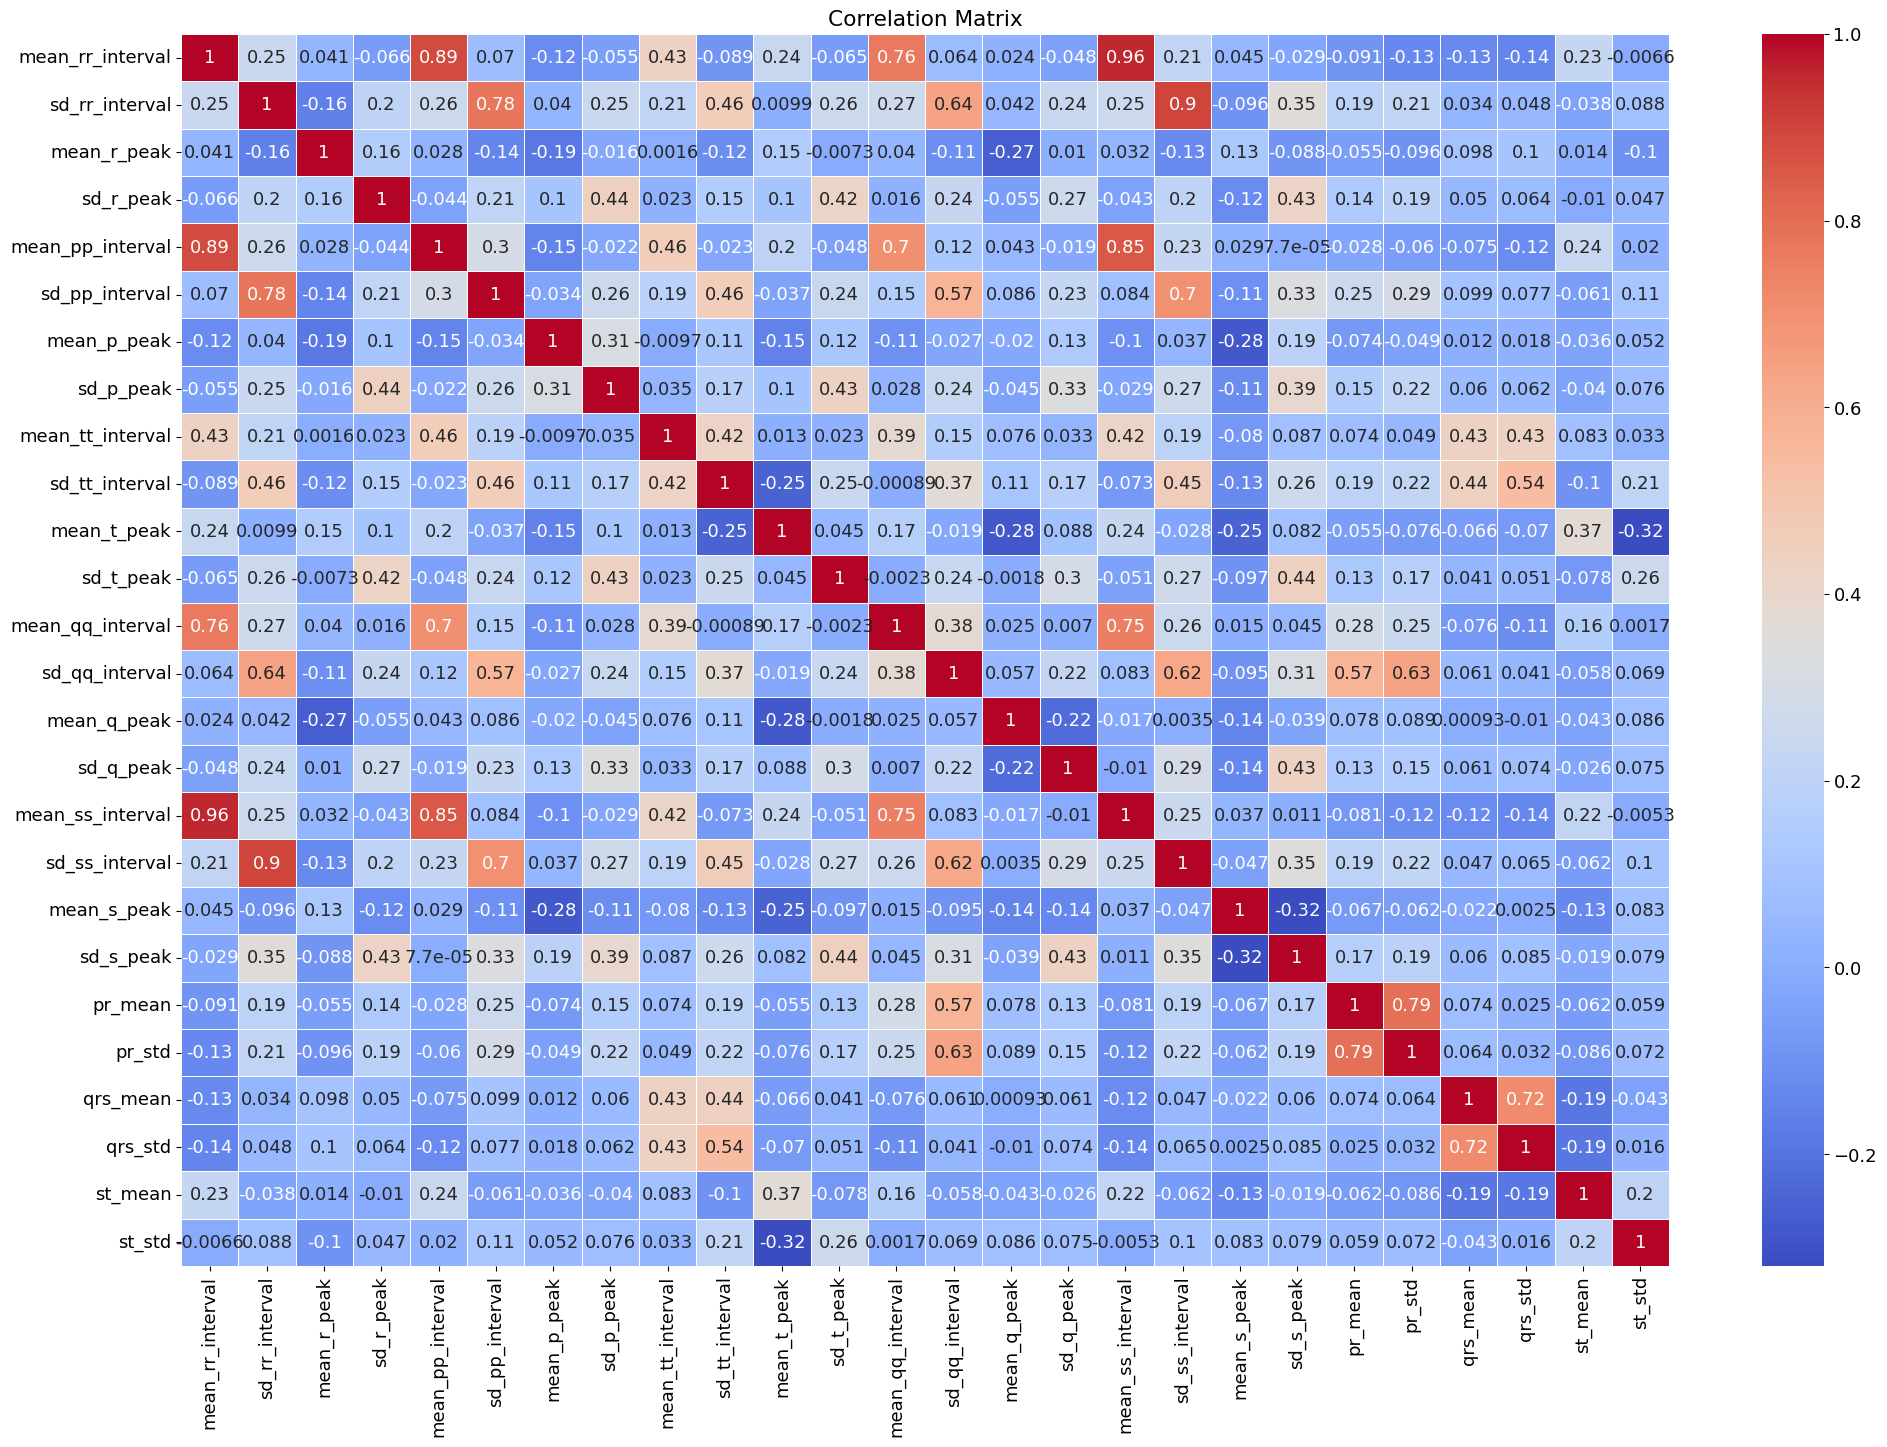

In [17]:
import matplotlib.pyplot as plt
correlation_matrix = feature_df.corr()
plt.figure(figsize=(24,16))
plt.rcParams.update({'font.size': 13})
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


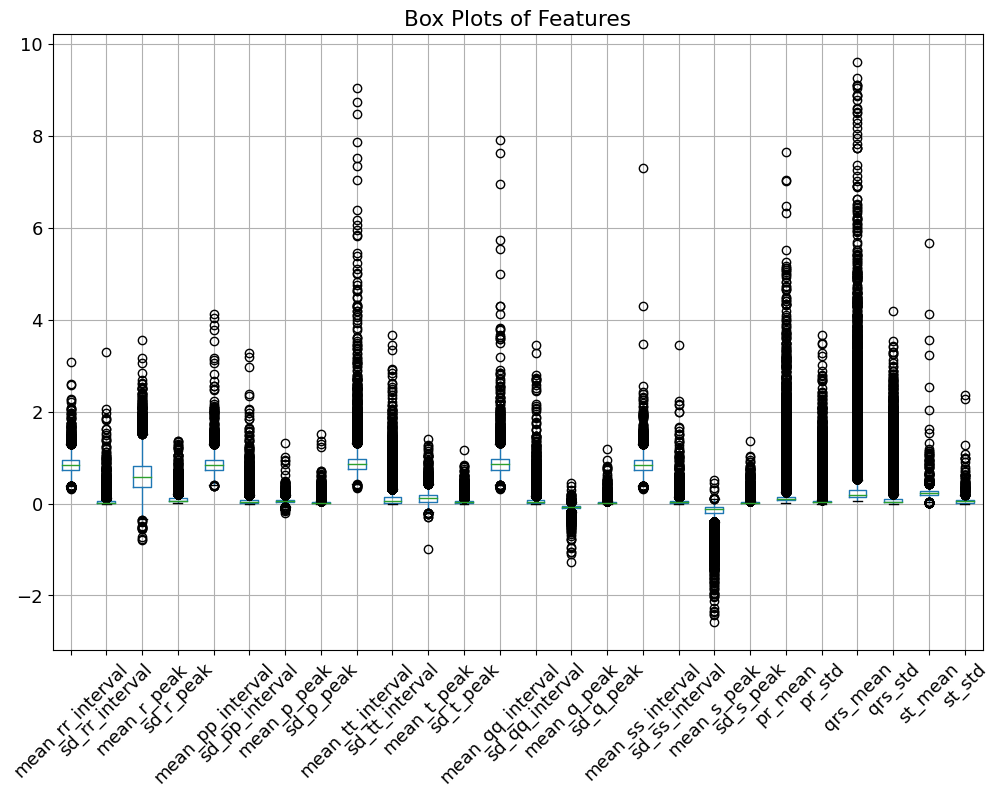

In [17]:
feature_df.boxplot(figsize=(12, 8), rot=45)
plt.title('Box Plots of Features')
plt.show()


In [7]:
# Assuming that 'feature_df' is your DataFrame
# You can replace 'feature_df' with the actual name of your DataFrame

# Check counts of qrs_mean, qt_mean, and pr_mean with values less than 0
pr_mean_negative_count = len(feature_df[feature_df['pr_mean'] < 0])
qrs_mean_negative_count = len(feature_df[feature_df['qrs_mean'] < 0])
st_mean_negative_count = len(feature_df[feature_df['st_mean'] < 0])

# Print the counts
print("Count of qrs_mean < 0:", qrs_mean_negative_count)
print("Count of st_mean < 0:", st_mean_negative_count)
print("Count of pr_mean < 0:", pr_mean_negative_count)


Count of qrs_mean < 0: 0
Count of st_mean < 0: 0
Count of pr_mean < 0: 0


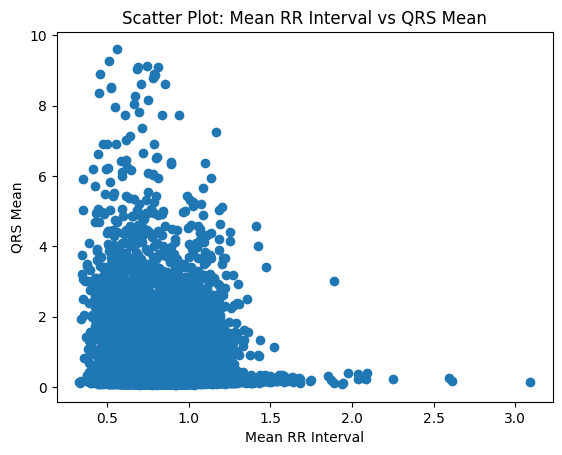

In [9]:
import matplotlib.pyplot as plt
plt.scatter(feature_df['mean_rr_interval'], feature_df['qrs_mean'])
plt.xlabel('Mean RR Interval')
plt.ylabel('QRS Mean')
plt.title('Scatter Plot: Mean RR Interval vs QRS Mean')
plt.show()


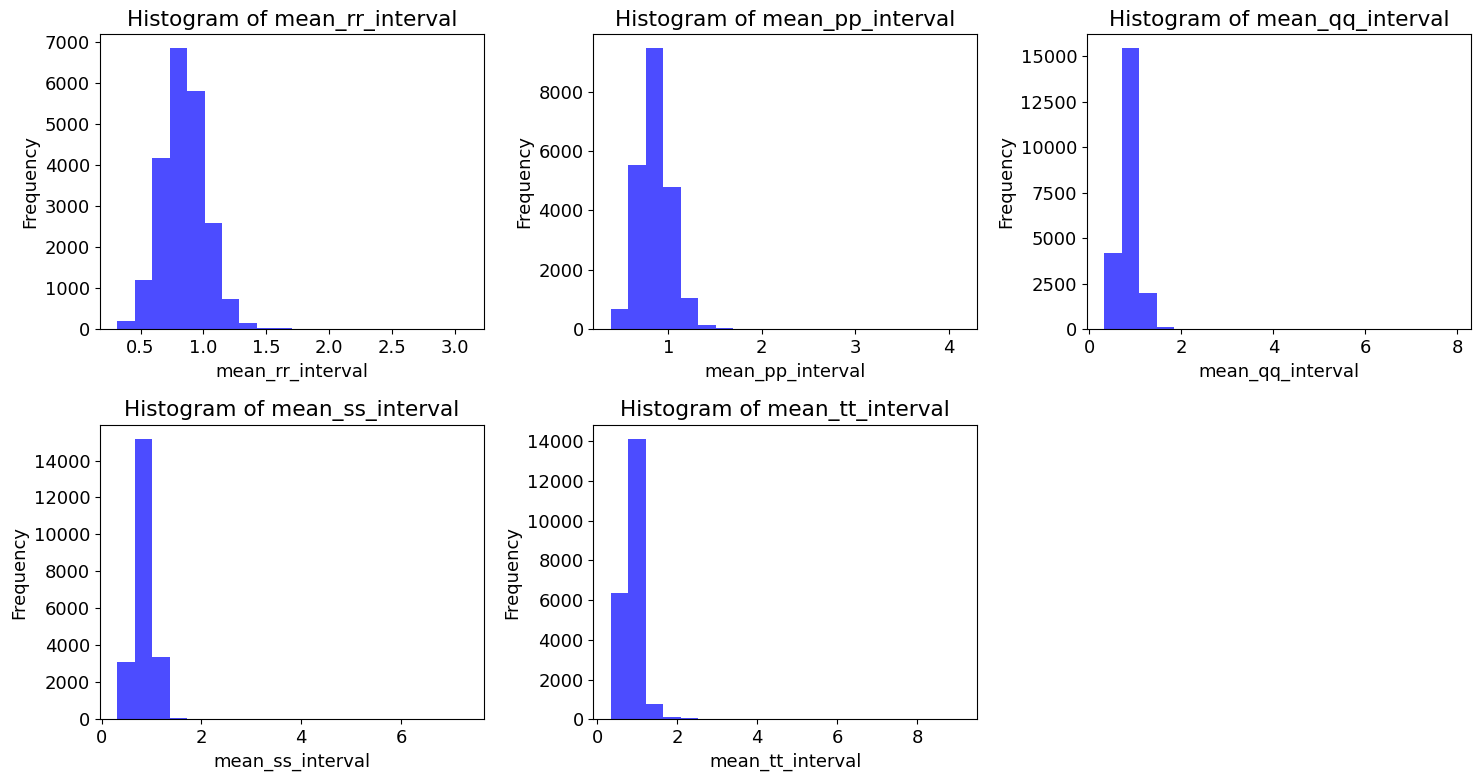

In [32]:
import matplotlib.pyplot as plt

# Extract the columns of interest
columns_of_interest = [
    'mean_rr_interval', 'mean_pp_interval', 'mean_qq_interval', 'mean_ss_interval', 'mean_tt_interval'
]

# Create subplots for each histogram
plt.figure(figsize=(15, 8))

for i, column in enumerate(columns_of_interest):
    plt.subplot(2, 3, i + 1)
    plt.hist(feature_df[column], bins=20, color='blue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Temporal and Amplitude features

In [10]:
import pandas as pd


# List of Temporal Features and Amplitude Features
temporal_features = [
    "mean_rr_interval", "sd_rr_interval", "mean_pp_interval", "sd_pp_interval",
    "mean_qq_interval", "sd_qq_interval", "mean_ss_interval", "sd_ss_interval",
    "mean_tt_interval", "sd_tt_interval", "qrs_mean", "qrs_std",
    "st_mean", "st_std", "pr_mean", "pr_std"
]

amplitude_features = [
    "mean_r_peak", "sd_r_peak", "mean_p_peak", "sd_p_peak",
    "mean_q_peak", "sd_q_peak", "mean_s_peak", "sd_s_peak",
    "mean_t_peak", "sd_t_peak"
]

# Separate features
temporal_df = feature_df[temporal_features]
amplitude_df = feature_df[amplitude_features]

# Now you have two DataFrames: temporal_df and amplitude_df


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

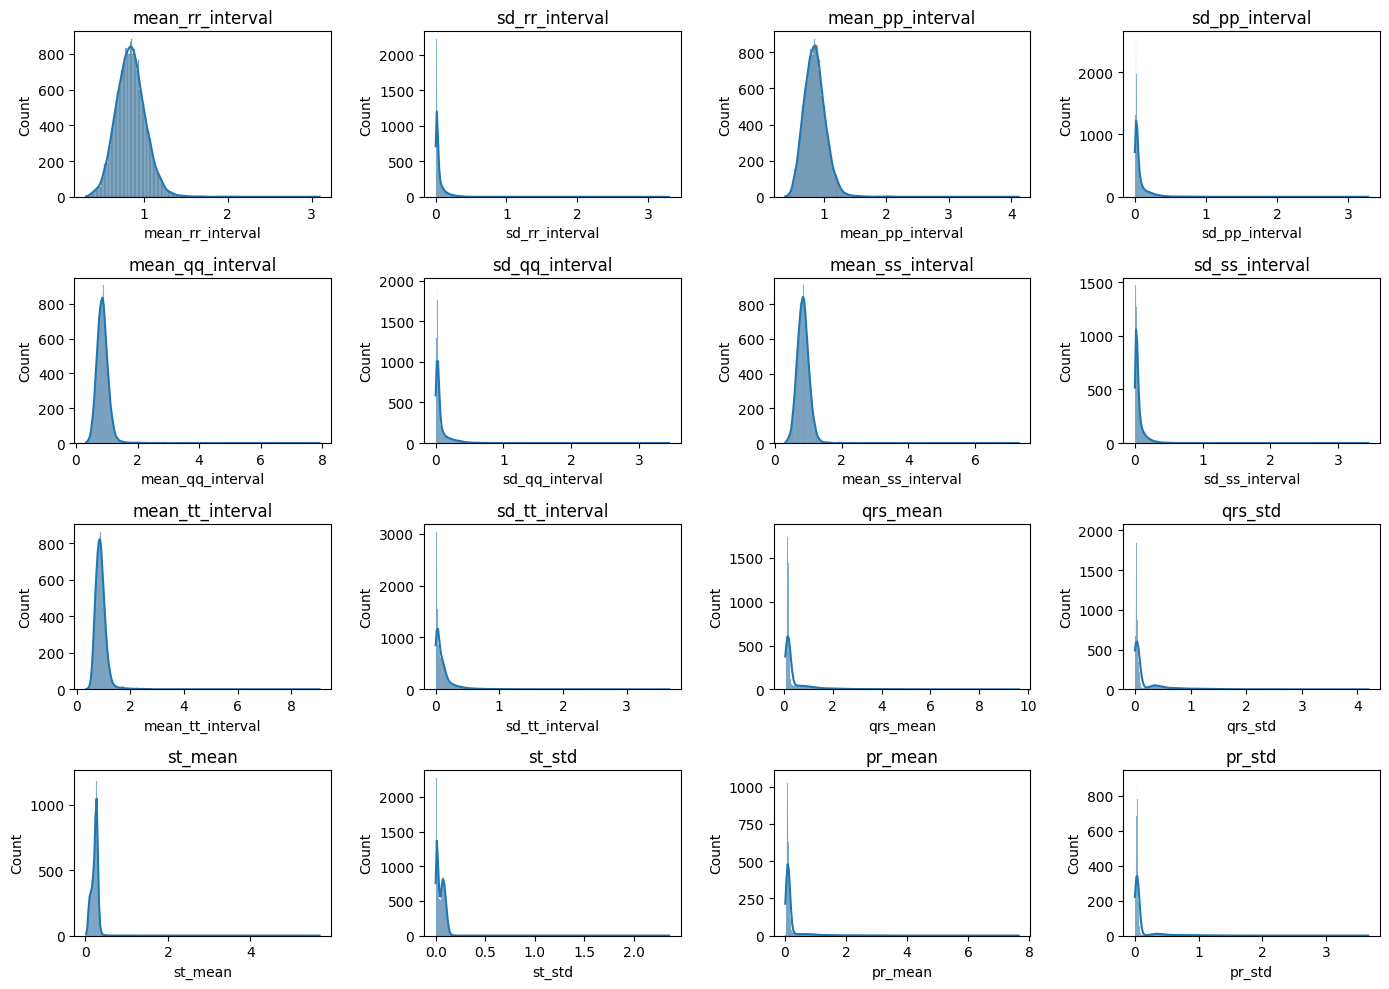

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create histograms for Temporal Features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(temporal_features):
    plt.subplot(4, 4, i + 1)
    sns.histplot(temporal_df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

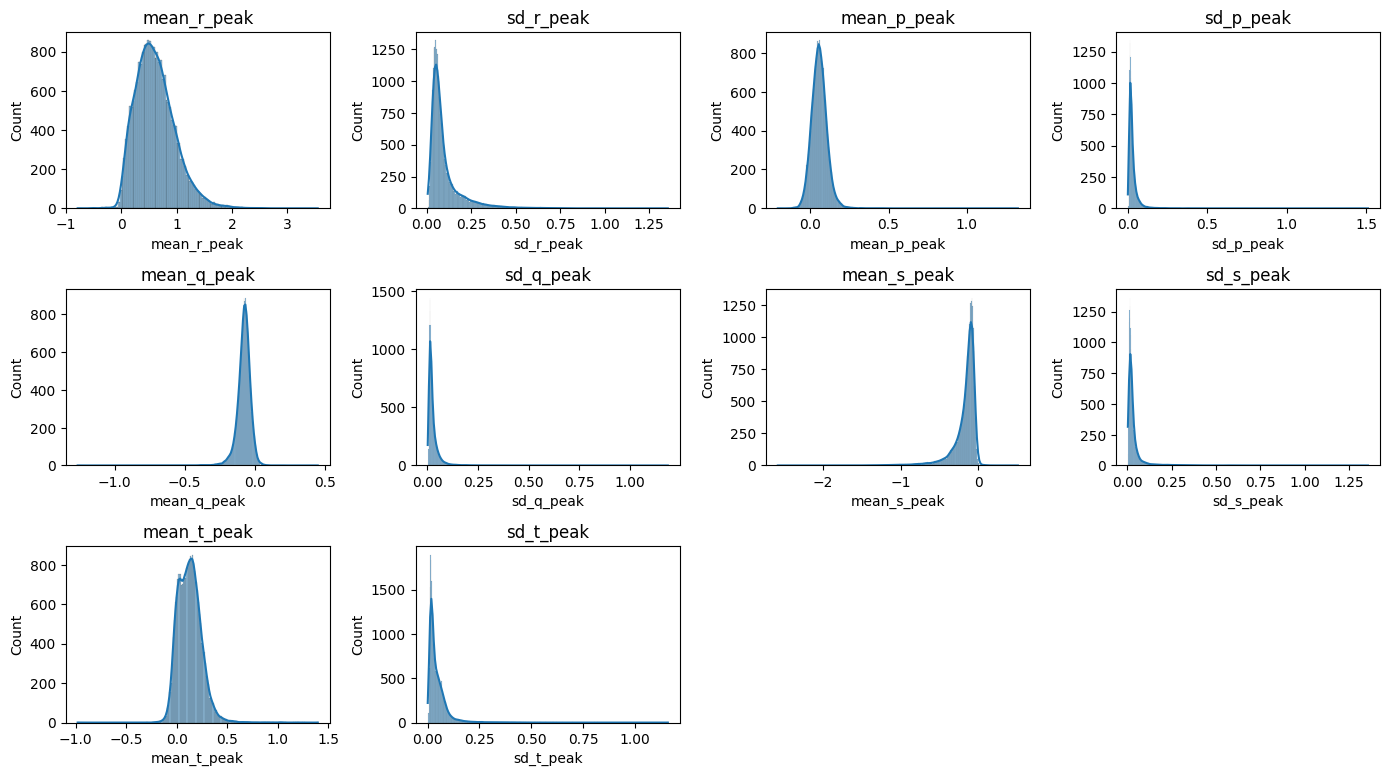

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create histograms for Temporal Features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(amplitude_features):
    plt.subplot(4, 4, i + 1)
    sns.histplot(amplitude_df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


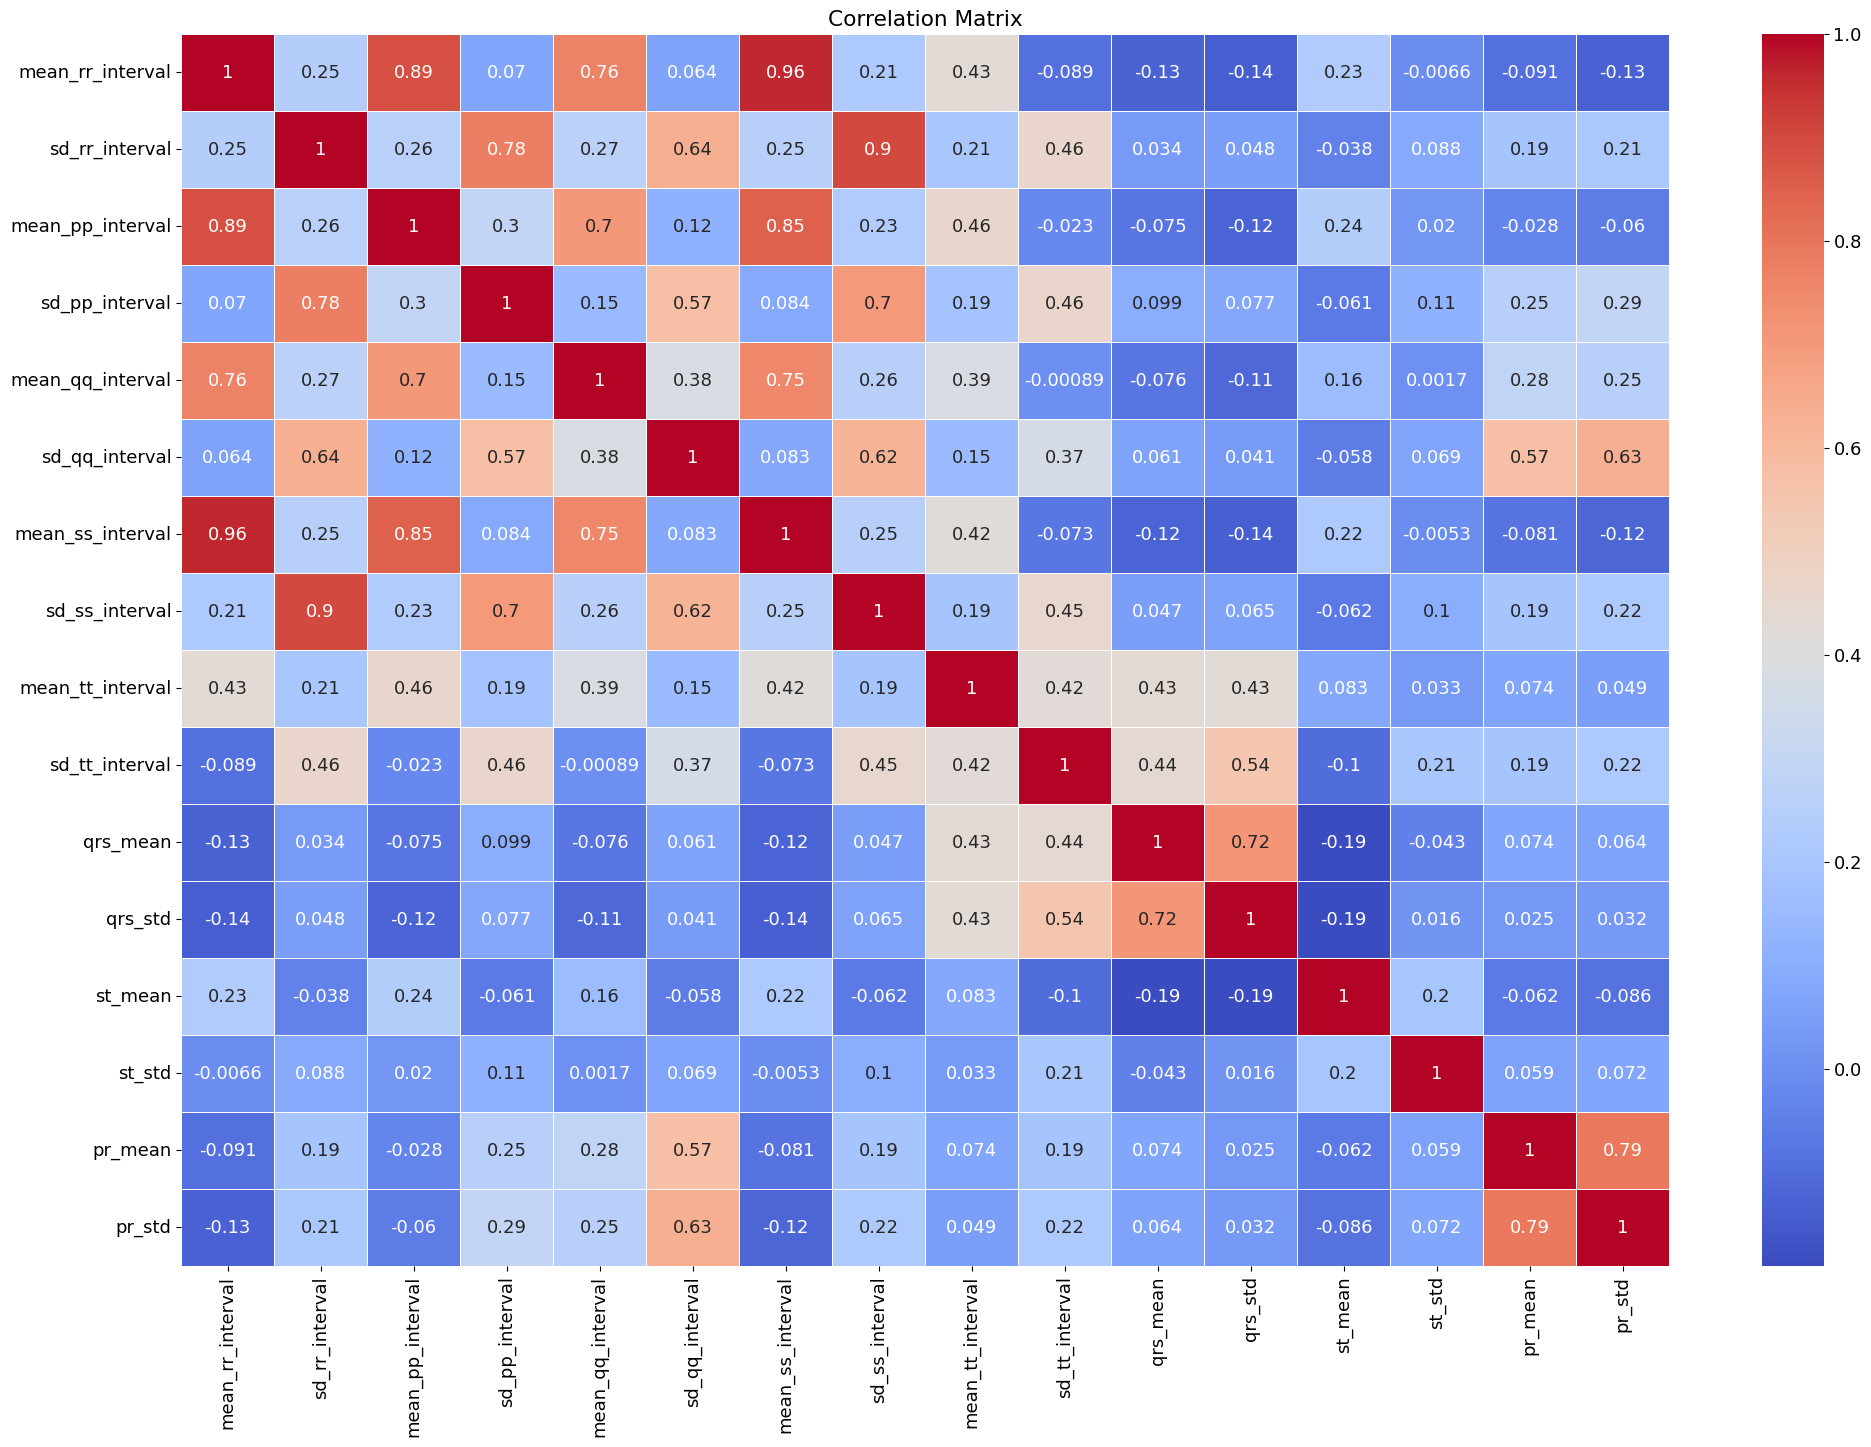

In [13]:
correlation_matrix = temporal_df.corr()
plt.figure(figsize=(24,16))
plt.rcParams.update({'font.size': 13})
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

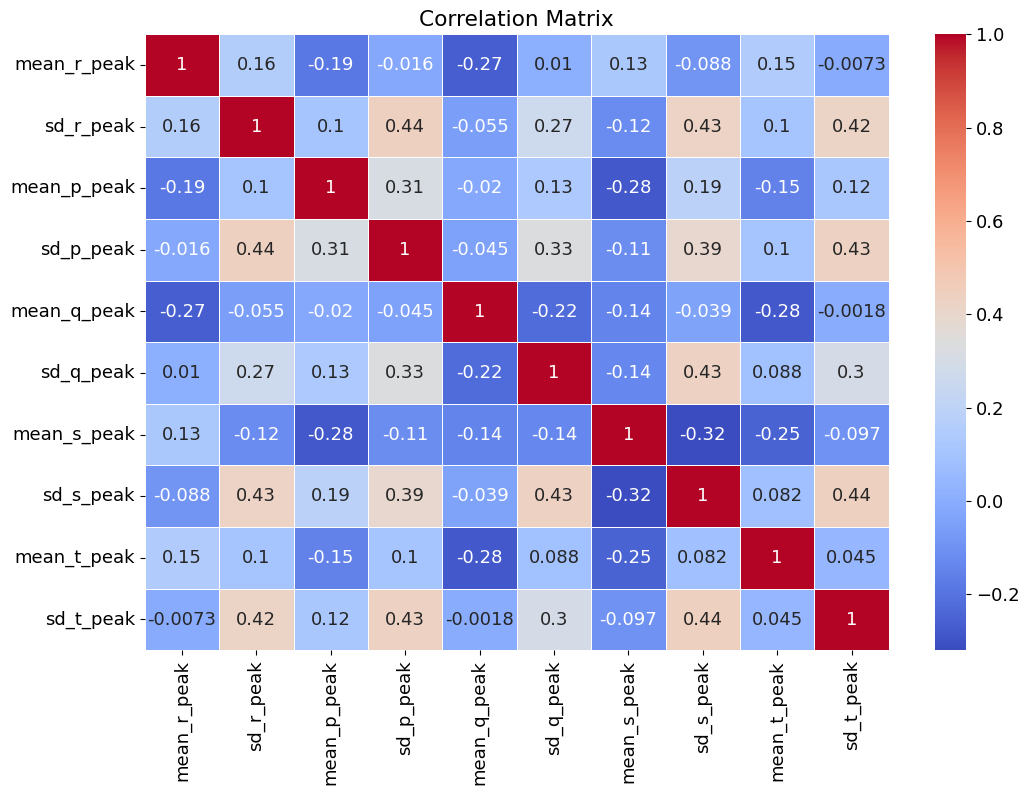

In [14]:
correlation_matrix = amplitude_df.corr()
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 13})
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

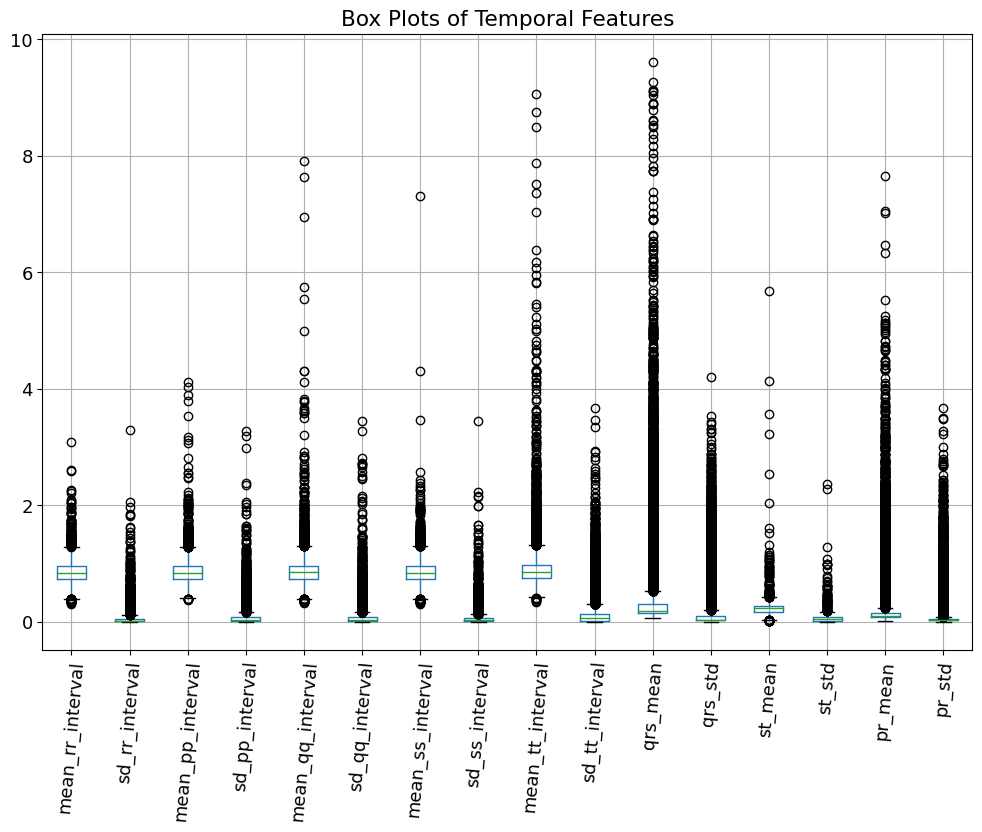

In [15]:
temporal_df.boxplot(figsize=(12, 8), rot=85)
plt.title('Box Plots of Temporal Features')
plt.show()

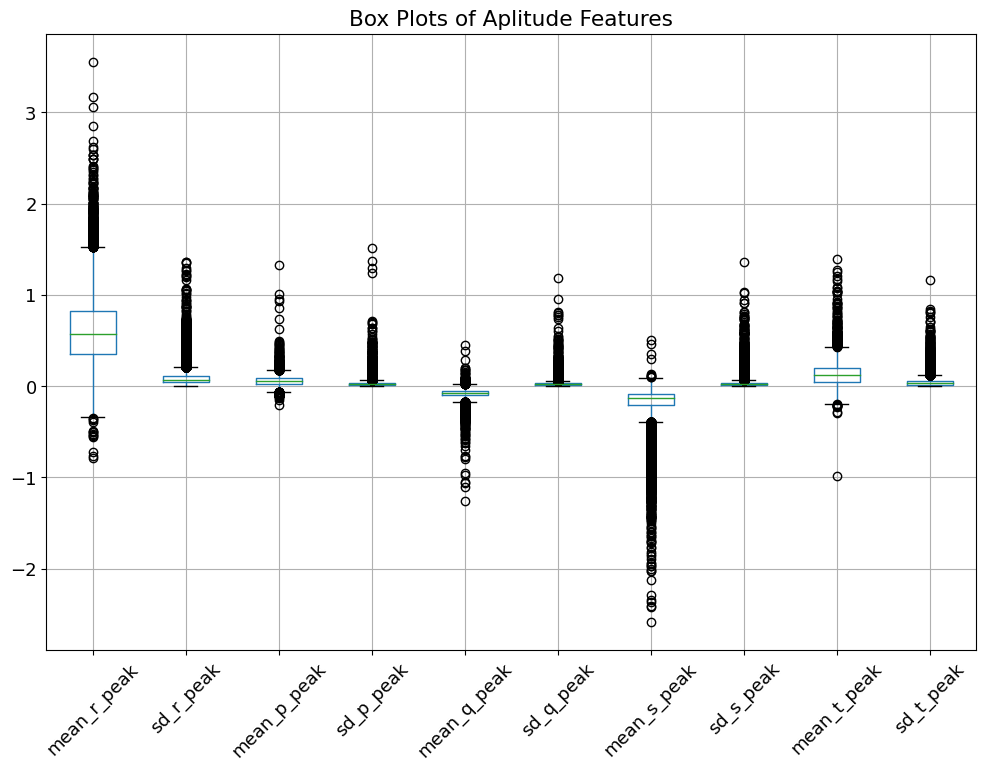

In [16]:
amplitude_df.boxplot(figsize=(12, 8), rot=45)
plt.title('Box Plots of Aplitude Features')
plt.show()

In [4]:
import pandas as pd
path = 'D:/Test Jupyter/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/ptbxl/'
# Read the file and convert tags
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

In [44]:
Y.shape

(21801, 45)

In [5]:
Y.diagnostic_superclass.value_counts()


diagnostic_superclass
[NORM]                 9072
[MI]                   2532
[STTC]                 2401
[CD]                   1708
[MI, CD]               1281
[HYP, STTC]             781
[MI, STTC]              600
[HYP]                   535
[CD, STTC]              471
[CD, NORM]              407
[]                      405
[MI, HYP, STTC]         361
[CD, HYP]               300
[MI, CD, STTC]          220
[CD, HYP, STTC]         211
[MI, HYP]               183
[MI, HYP, CD, STTC]     154
[MI, HYP, CD]           111
[STTC, NORM]             28
[CD, MI]                 19
[CD, HYP, MI]             6
[CD, STTC, NORM]          5
[CD, MI, STTC]            3
[CD, HYP, NORM]           2
[HYP, NORM]               2
[CD, HYP, MI, STTC]       2
[CD, HYP, MI, NORM]       1
Name: count, dtype: int64

In [6]:
test_fold = 10
y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass

In [7]:
y_train.shape

(19603,)

In [8]:

# Get diagnostic information in scp_statements.csv
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)

In [9]:
agg_df = agg_df[agg_df.diagnostic == 1]

In [10]:
def diagnostic_class(scp):
    res = set()
    for k in scp.keys():
        if k in agg_df.index:
            res.add(agg_df.loc[k].diagnostic_class)
    return list(res)

In [11]:
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

In [12]:
Y['scp_classes'] = Y.scp_codes.apply(diagnostic_class)

In [13]:
Z = pd.DataFrame(0, index=Y.index, columns=['NORM', 'MI', 'STTC', 'CD', 'HYP'], dtype='int')
for i in Z.index:
    for k in Y.loc[i].scp_classes:
        Z.loc[i, k] = 1

Z

,NORM,MI,STTC,CD,HYP
ecg_id,,,,,
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
21833,0,0,1,0,0
21834,1,0,0,0,0
21835,0,0,1,0,0


### Load all features from each lead

In [68]:
import numpy as np
data_filepath = 'D:/Test Jupyter/ECG-Classfier-main/data/'

feature_df0 = np.load(data_filepath + 'feature_df0.npy')
feature_df1 = np.load(data_filepath + 'feature_df1.npy')
feature_df2 = np.load(data_filepath + 'feature_df2.npy')
feature_df3 = np.load(data_filepath + 'feature_df3.npy')
feature_df4 = np.load(data_filepath + 'feature_df4.npy')
feature_df5 = np.load(data_filepath + 'feature_df5.npy')
feature_df6 = np.load(data_filepath + 'feature_df6.npy')
feature_df7 = np.load(data_filepath + 'feature_df7.npy')
feature_df8 = np.load(data_filepath + 'feature_df8.npy')
feature_df9 = np.load(data_filepath + 'feature_df9.npy')
feature_df10 = np.load(data_filepath + 'feature_df10.npy')
feature_df11 = np.load(data_filepath + 'feature_df11.npy')

In [69]:
import pandas as pd
import numpy as np


column_names = [
    'mean_rr_interval', 'sd_rr_interval', 'mean_r_peak', 'sd_r_peak',
    'mean_pp_interval', 'sd_pp_interval', 'mean_p_peak', 'sd_p_peak',
    'mean_tt_interval', 'sd_tt_interval', 'mean_t_peak', 'sd_t_peak',
    'mean_qq_interval', 'sd_qq_interval', 'mean_q_peak', 'sd_q_peak',
    'mean_ss_interval', 'sd_ss_interval', 'mean_s_peak', 'sd_s_peak',
    'pr_mean', 'pr_std', 'qrs_mean', 'qrs_std', 'st_mean', 'st_std'
]

feature_df0 = pd.DataFrame(data=feature_df0, columns=column_names)
feature_df1 = pd.DataFrame(data=feature_df1, columns=column_names)
feature_df2 = pd.DataFrame(data=feature_df2, columns=column_names)
feature_df3 = pd.DataFrame(data=feature_df3, columns=column_names)
feature_df4 = pd.DataFrame(data=feature_df4, columns=column_names)
feature_df5 = pd.DataFrame(data=feature_df5, columns=column_names)
feature_df6 = pd.DataFrame(data=feature_df6, columns=column_names)
feature_df7 = pd.DataFrame(data=feature_df7, columns=column_names)
feature_df8 = pd.DataFrame(data=feature_df8, columns=column_names)
feature_df9 = pd.DataFrame(data=feature_df9, columns=column_names)
feature_df10 = pd.DataFrame(data=feature_df10, columns=column_names)
feature_df11 = pd.DataFrame(data=feature_df11, columns=column_names)

In [70]:
feature_df1.shape

(21801, 26)

### Combine all features from each lead

In [90]:
# Assuming you have feature_df0, feature_df1, feature_df2, etc.
feature_dfs = [feature_df0, feature_df1, feature_df2, feature_df3, feature_df4, feature_df5, feature_df6, feature_df7, feature_df8 , feature_df9, feature_df10, feature_df11]

# Merge dataframes vertically
feature_df = pd.concat(feature_dfs, ignore_index=True)
Z = pd.concat([Z] * len(feature_dfs), ignore_index=True)

In [91]:
Z.shape

(261612, 5)

In [72]:
feature_df.shape

(261612, 26)

In [73]:
feature_df.describe()

,mean_rr_interval,sd_rr_interval,mean_r_peak,sd_r_peak,mean_pp_interval,sd_pp_interval,mean_p_peak,sd_p_peak,mean_tt_interval,sd_tt_interval,...,mean_ss_interval,sd_ss_interval,mean_s_peak,sd_s_peak,pr_mean,pr_std,qrs_mean,qrs_std,st_mean,st_std
count,259216.000000,259216.000000,259216.000000,259216.000000,258994.000000,258994.000000,259073.000000,258994.000000,253305.000000,253305.000000,...,259171.000000,259171.000000,259195.000000,259171.000000,240436.000000,240436.000000,232313.000000,232313.000000,251785.000000,251785.000000
mean,0.857779,0.066311,0.591928,0.113971,0.876090,0.103719,0.027106,0.035001,0.957412,0.162812,...,0.861155,0.076382,-0.371730,0.059212,0.322218,0.146489,0.506865,0.194805,0.226460,0.051514
std,0.197552,0.130972,0.525890,0.132011,0.213495,0.164537,0.062188,0.055274,0.457937,0.277663,...,0.208263,0.132094,0.431043,0.085141,0.637095,0.303116,0.946881,0.410420,0.112201,0.060759
min,0.310345,0.000000,-9.098727,0.001225,0.319167,0.000000,-0.885642,0.000050,0.280000,0.000000,...,0.313929,0.000000,-6.851832,0.000667,0.010000,0.000000,0.030000,0.000000,0.010000,0.000000
25%,0.733333,0.012490,0.170455,0.045334,0.749167,0.022588,-0.004464,0.014666,0.769167,0.023570,...,0.735000,0.015713,-0.509243,0.018023,0.085000,0.029120,0.148890,0.021650,0.162000,0.015370
50%,0.846000,0.024678,0.468000,0.072934,0.857000,0.046909,0.025405,0.021522,0.881000,0.067183,...,0.848000,0.033331,-0.208295,0.032203,0.118750,0.041310,0.180910,0.035710,0.237690,0.044990
75%,0.961111,0.061667,0.871538,0.128110,0.972222,0.108714,0.054464,0.034099,1.013750,0.169339,...,0.963750,0.083326,-0.094237,0.065353,0.180000,0.064003,0.272860,0.077870,0.280000,0.076050
max,3.200000,3.344637,7.962273,4.021394,9.160000,3.995000,3.043066,1.796733,9.490000,4.145000,...,7.600000,3.605000,1.110278,4.033847,8.960000,4.270000,9.730000,4.475000,8.290000,3.500000


### Fill NaN values with the mean of the column

In [74]:
feature_df_nonan = feature_df.fillna(feature_df.mean())

### Standardize all features

In [75]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(feature_df_nonan)


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_spar

### PCA

In [76]:
from sklearn.decomposition import PCA

# Define the number of components you want to keep
# n_components = 10  # You can adjust this based on your needs
components = None
pca = PCA(n_components=components)
pca_result = pca.fit_transform(scaled_data)


In [77]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[19.97666922 12.20201149 10.62752216  8.37787797  7.43110065  5.40691795
  5.02068802  4.42704411  4.18342344  2.8066836   2.30613114  2.0121085
  1.8173414   1.75065772  1.69374096  1.51089156  1.46012935  1.37146579
  1.2676756   1.04267995  0.85431589  0.81616316  0.69546292  0.47850089
  0.35342508  0.10937146]



In [78]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 19.97666922  32.17868071  42.80620286  51.18408083  58.61518148
  64.02209944  69.04278746  73.46983157  77.65325502  80.45993862
  82.76606976  84.77817826  86.59551967  88.34617738  90.03991835
  91.55080991  93.01093926  94.38240505  95.65008066  96.6927606
  97.54707649  98.36323966  99.05870257  99.53720346  99.89062854
 100.        ]



Text(0, 0.5, 'Explained variance (%)')

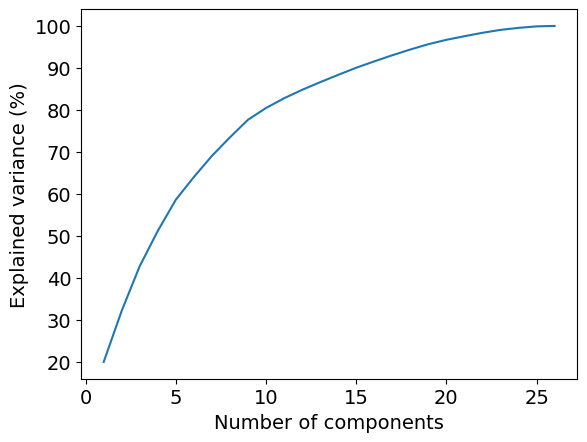

In [79]:
import matplotlib.pyplot as plt
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.rc('font', size=14) 
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Note: The first 15 components together capture about 90% variability in the data.

Cumulative Variances (Percentage):
[19.97666922 32.17868071 42.80620286 51.18408083 58.61518148 64.02209944
 69.04278746 73.46983157 77.65325502 80.45993862 82.76606976 84.77817826
 86.59551967 88.34617738 90.03991835]
Number of components: 15


Text(0, 0.5, 'Explained variance (%)')

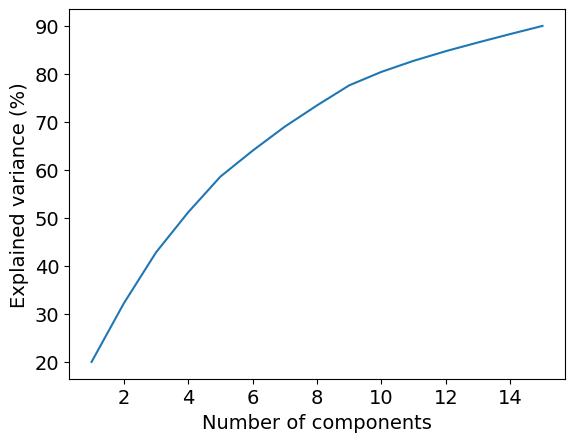

In [80]:
pca = PCA(n_components = 0.90)
pca.fit(scaled_data)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.rc('font', size=14) 
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [81]:
# importance of each feature that contributes to each of the components using the components_ attribute of the pca object:
pca_components = abs(pca.components_)
print(pca_components)

[[0.26686515 0.3539233  0.03071287 0.11038077 0.28376659 0.31833558
  0.10911784 0.14449955 0.19330978 0.22090395 0.0610964  0.13337126
  0.25962752 0.29653589 0.075356   0.16233698 0.27338976 0.34366228
  0.0828262  0.17471746 0.13453848 0.14112831 0.06331891 0.07115862
  0.0395796  0.04239435]
 [0.38421606 0.04009478 0.01349754 0.26671856 0.31699276 0.04347488
  0.16846892 0.29983275 0.00887038 0.1617688  0.01508921 0.28344917
  0.20230555 0.06523259 0.07494782 0.23543517 0.36840298 0.00974333
  0.10590233 0.27821165 0.12849312 0.1638153  0.17845904 0.19487048
  0.06847849 0.05877728]
 [0.01752458 0.07058542 0.24645517 0.23287187 0.01231599 0.05965614
  0.15925702 0.16770609 0.30829739 0.34318162 0.30781459 0.17803367
  0.17329198 0.13971108 0.05013909 0.01215225 0.02066019 0.07754721
  0.14663406 0.08539559 0.22341491 0.2233119  0.33061413 0.39985736
  0.12879132 0.10133718]
 [0.10892291 0.05071509 0.22343658 0.04042662 0.09659758 0.02057713
  0.2078815  0.16634661 0.08455936 0.0935

In [82]:
print('Top 3 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 3 values in each row
    temp = np.argpartition(-(pca_components[row]), 3)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:3]
    
    # print the top 3 feature names
    print(f'Component {row}: {feature_df.columns[indices].to_list()}')

Top 3 most important features in each component
Component 0: ['sd_rr_interval', 'sd_ss_interval', 'sd_pp_interval']
Component 1: ['mean_rr_interval', 'mean_ss_interval', 'mean_pp_interval']
Component 2: ['qrs_std', 'sd_tt_interval', 'qrs_mean']
Component 3: ['pr_std', 'pr_mean', 'sd_qq_interval']
Component 4: ['mean_tt_interval', 'mean_t_peak', 'qrs_std']
Component 5: ['mean_s_peak', 'st_std', 'mean_t_peak']
Component 6: ['st_std', 'st_mean', 'mean_q_peak']
Component 7: ['mean_q_peak', 'sd_p_peak', 'sd_q_peak']
Component 8: ['mean_p_peak', 'sd_q_peak', 'sd_pp_interval']
Component 9: ['sd_s_peak', 'mean_p_peak', 'mean_q_peak']
Component 10: ['sd_t_peak', 'mean_r_peak', 'sd_q_peak']
Component 11: ['sd_pp_interval', 'qrs_mean', 'mean_pp_interval']
Component 12: ['qrs_mean', 'sd_tt_interval', 'sd_pp_interval']
Component 13: ['sd_r_peak', 'mean_r_peak', 'sd_t_peak']
Component 14: ['sd_p_peak', 'sd_r_peak', 'sd_q_peak']


In [84]:
#Transforming all the Columns to the 15 Principal Components
X_pca = pca.transform(scaled_data)
print(X_pca.shape)
print(X_pca)

(261612, 15)
[[-0.56753858 -0.8542594  -0.47429034 ...  0.05381282 -0.74887953
  -0.29958411]
 [ 1.55350287 -3.45324533  0.72671447 ...  0.27861494  0.24295045
   0.95730732]
 [-0.58353324 -1.33983925  0.42947331 ...  0.03091009  0.31275466
   0.48907615]
 ...
 [-0.13320349 -1.80192356 -0.4926208  ...  0.07786676 -0.58185656
  -0.08697157]
 [ 0.29813976  1.02724551  1.30558434 ...  0.36510478  0.77436351
   0.6137564 ]
 [-0.34309103 -1.45598709  0.34942516 ... -0.10365321 -0.88385506
   0.11216013]]


In [85]:
pca_column_names = [f'PCA_{i+1}' for i in range(15)]
A=pd.DataFrame(X_pca,columns=pca_column_names)
A

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15
0,-0.567539,-0.854259,-0.474290,0.099701,-0.839472,0.831082,-0.167802,-1.195742,0.740674,-0.065604,0.574529,-0.195046,0.053813,-0.748880,-0.299584
1,1.553503,-3.453245,0.726714,0.552421,1.492087,-0.171096,-0.350807,-0.369417,0.270716,-0.023764,0.428526,0.442160,0.278615,0.242950,0.957307
2,-0.583533,-1.339839,0.429473,0.271656,0.405260,0.453851,-0.108490,-0.161550,-0.112299,0.548223,-0.061176,0.086705,0.030910,0.312755,0.489076
3,-1.229561,-0.499763,0.242807,0.662866,-0.212054,-0.736002,-0.075570,0.279128,-0.033546,0.284911,-0.029520,-0.131274,-0.121664,0.256884,0.237200
4,-0.550231,-0.969254,-0.321229,0.082590,0.078103,0.382453,0.377476,-0.016683,-0.234096,-0.147329,0.618336,0.175823,-0.191096,-0.074934,0.411391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261607,0.691310,7.901937,3.650650,2.213970,-0.586174,2.646068,-1.415068,-6.359625,0.489156,3.163043,1.535067,0.078980,0.553404,0.010715,1.819758
261608,-0.955083,-0.733869,0.833788,0.245317,0.701096,0.825144,-0.158521,-0.426166,-0.336724,0.070352,-0.085210,0.028263,0.134517,0.672147,-0.195818
261609,-0.133203,-1.801924,-0.492621,-0.182822,-0.241474,0.730130,-0.101549,-0.627226,0.430454,-0.157323,0.391261,0.186299,0.077867,-0.581857,-0.086972
261610,0.298140,1.027246,1.305584,0.022791,-0.122990,0.723014,0.198984,-1.312711,-0.021579,0.899778,0.745527,0.077148,0.365105,0.774364,0.613756


In [93]:
# Combine pca_df and Z horizontally
combined_data = pd.concat([A, Z], axis=1)

In [94]:
combined_data.shape

(261612, 20)

### Train and test split

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have combined_data with PCA components and target labels

# Separate the features (X) and target labels (y)
X = combined_data.iloc[:, :-5]  # Assuming the last 5 columns are target labels
y = combined_data.iloc[:, -5:]  # Assuming there are 5 target labels

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
# Verify the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (209289, 15)
y_train shape: (209289, 5)
X_test shape: (52323, 15)
y_test shape: (52323, 5)


In [100]:
# Check if X_train and y_train have the same number of samples
if X_train.shape[0] != y_train.shape[0]:
    raise ValueError("Number of samples in X_train and y_train are not consistent.")

# Create a classifier, e.g., Random Forest, and a MultiOutputClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
multi_label_classifier = MultiOutputClassifier(classifier)

# Fit the multilabel classifier to the training data
multi_label_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = multi_label_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_spar

Accuracy: 0.33
              precision    recall  f1-score   support

           0       0.70      0.66      0.68     23020
           1       0.58      0.11      0.18     13064
           2       0.65      0.24      0.35     12420
           3       0.63      0.12      0.20     11721
           4       0.67      0.08      0.14      6340

   micro avg       0.68      0.32      0.44     66565
   macro avg       0.65      0.24      0.31     66565
weighted avg       0.65      0.32      0.38     66565
 samples avg       0.39      0.36      0.37     66565



c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_spar

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report
# Create a Support Vector Machine classifier
# You can choose either SVC or LinearSVC depending on your data and needs
classifier = SVC(kernel='linear', C=1.0, random_state=42)
# Alternatively, you can use LinearSVC:
# classifier = LinearSVC(C=1.0, random_state=42)

# Create a MultiOutputClassifier with the SVM classifier
multi_label_classifier = MultiOutputClassifier(classifier)

# Fit the multilabel classifier to the training data
multi_label_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = multi_label_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_spar

In [14]:

# # Train
X_train = feature_df[(Y.strat_fold <= 8)]
y_train = Z[Y.strat_fold <= 8]
# # Test
X_test = feature_df[(Y.strat_fold >8)]
y_test = Z[Y.strat_fold > 8]

print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

(17441, 26) (17441, 5)
(4396, 26) (4396, 5)


In [19]:
save_path = 'D:/Test Jupyter/ECG-Classfier-main/data/ecg_featurizer/'

np.save(save_path+'X_train.npy', X_train)
np.save(save_path+'y_train.npy', np.array(y_train))
np.save(save_path+'X_test.npy', X_test)
np.save(save_path+'y_test.npy', np.array(y_test))